# Hyperparameters

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

batch_size = 64
lr = 0.0002
epochs = 60

# Data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Using device: cuda


# Generator and Discriminator

In [34]:



class Generator(nn.Module):
    def __init__(self, input_dim=100, output_dim=784):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim=784):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# Init the Generator and Discriminator

In [35]:
# Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss function
criterion = nn.BCEWithLogitsLoss()

# Optimizers
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# Train

In [36]:
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(train_loader):
        # Flatten the images
        real_images = real_images.view(real_images.size(0), -1).to(device)

        # Real and Fake Labels
        real_labels = torch.ones(real_images.size(0), 1).to(device)
        fake_labels = torch.zeros(real_images.size(0), 1).to(device)

        # Train Discriminator
        # Real images
        real_output = discriminator(real_images).to(device)
        d_loss_real = criterion(real_output, real_labels)

        # Fake images
        noise = torch.randn(real_images.size(0), 100).to(device)
        fake_images = generator(noise).to(device)
        fake_output = discriminator(fake_images.detach())
        d_loss_fake = criterion(fake_output, fake_labels)

        d_loss = d_loss_real + d_loss_fake

        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Train Generator
        noise = torch.randn(real_images.size(0), 100).to(device)
        fake_images = generator(noise)
        output = discriminator(fake_images)
        g_loss = criterion(output, real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

        # Print losses
        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}], Step [{i}/{len(train_loader)}], "
                  f"d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

Epoch [0/60], Step [0/938], d_loss: 1.3055, g_loss: 0.6705
Epoch [0/60], Step [100/938], d_loss: 0.2006, g_loss: 3.1272
Epoch [0/60], Step [200/938], d_loss: 0.0256, g_loss: 4.4665
Epoch [0/60], Step [300/938], d_loss: 0.8109, g_loss: 5.4268
Epoch [0/60], Step [400/938], d_loss: 0.0719, g_loss: 7.4371
Epoch [0/60], Step [500/938], d_loss: 0.0252, g_loss: 5.6347
Epoch [0/60], Step [600/938], d_loss: 0.0337, g_loss: 6.0342
Epoch [0/60], Step [700/938], d_loss: 0.0781, g_loss: 5.0590
Epoch [0/60], Step [800/938], d_loss: 0.0255, g_loss: 5.8354
Epoch [0/60], Step [900/938], d_loss: 0.1530, g_loss: 4.6960
Epoch [1/60], Step [0/938], d_loss: 0.6186, g_loss: 3.9608
Epoch [1/60], Step [100/938], d_loss: 0.6337, g_loss: 5.3610
Epoch [1/60], Step [200/938], d_loss: 0.2083, g_loss: 5.8180
Epoch [1/60], Step [300/938], d_loss: 1.2986, g_loss: 1.8749
Epoch [1/60], Step [400/938], d_loss: 0.3422, g_loss: 3.4736
Epoch [1/60], Step [500/938], d_loss: 1.1314, g_loss: 4.1381
Epoch [1/60], Step [600/938]

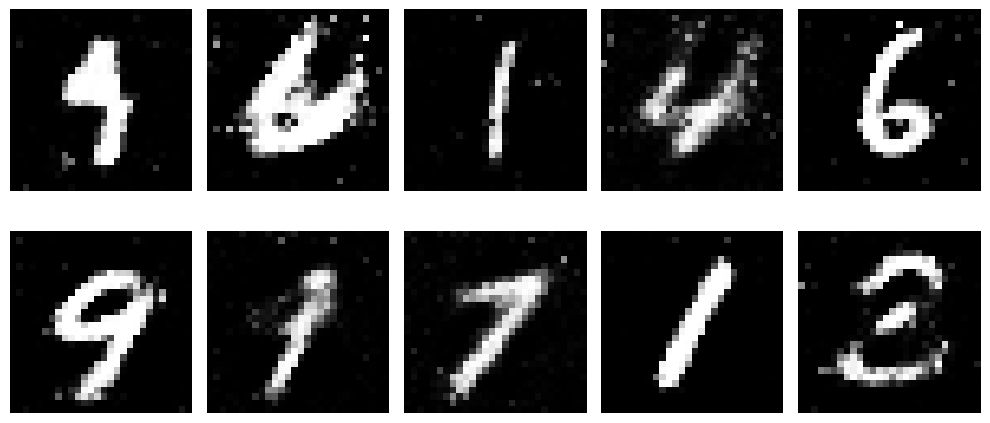

In [37]:
import torch
import matplotlib.pyplot as plt

# Generate 10 random images
with torch.no_grad():
    # Generate random noise
    noise = torch.randn(10, 100).to(device)  # 10 samples, each 100-dimensional
    generated_images = generator(noise)  # Output: [10, 784]

    # Reshape to [10, 28, 28]
    generated_images = generated_images.view(10, 28, 28)

    # Scale from [-1, 1] to [0, 1]
    generated_images = (generated_images + 1) / 2

# Convert to NumPy and plot
generated_images = generated_images.cpu().numpy()

# Display the generated images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i], cmap='gray')
    ax.axis('off')  # Remove axes
plt.tight_layout()
plt.show()

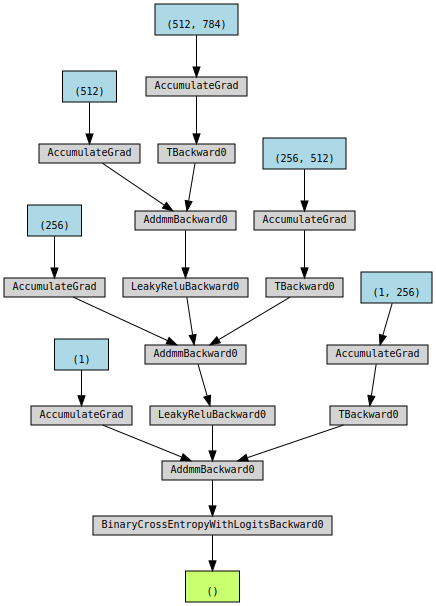

In [6]:
from torchviz import make_dot
make_dot(d_loss_fake, params=dict(generator.named_parameters()))

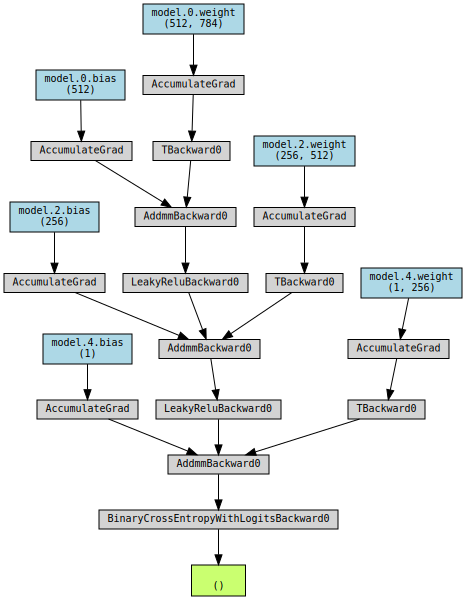

In [6]:
from torchviz import make_dot
make_dot(d_loss_real, params=dict(discriminator.named_parameters()))

# Using the CNN

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

batch_size = 64
lr = 0.0002
epochs = 5

# Data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

class Generator(nn.Module):
    def __init__(self, input_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(input_dim, 512, 7, 1, 0),  # 7x7
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, 4, 2, 1),  # 14x14
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 1, 4, 2, 1),  # 28x28
            nn.BatchNorm2d(1),
            nn.ReLU(),
            nn.Tanh()
        )
    
    def forward(self, x):
        x = x.view(x.size(0), x.size(1), 1, 1)
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1),  # 14x14
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, 2, 1),  # 7x7
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, 2, 1),  # 3x3
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 1, 3, 1, 0),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

Using device: cuda


In [6]:
def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
    elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)

        
# Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

generator.apply(init_weights)
discriminator.apply(init_weights)

# Loss function
criterion = nn.BCEWithLogitsLoss()

# Optimizers
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# Train

In [7]:
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(train_loader):

        real_images = real_images.to(device)
        
        # Real and Fake Labels
        real_labels = torch.ones([real_images.size(0), 1, 1, 1]).to(device)
        fake_labels = torch.zeros([real_images.size(0), 1, 1, 1]).to(device)

        # Train Discriminator
        # Real images
        real_output = discriminator(real_images)
        d_loss_real = criterion(real_output, real_labels)

        # Fake images
        noise = torch.randn(real_images.size(0), 100).to(device)
        fake_images = generator(noise)
        fake_output = discriminator(fake_images)
        d_loss_fake = criterion(fake_output, fake_labels)

        d_loss = d_loss_real + d_loss_fake

        optimizer_d.zero_grad()
        d_loss.backward(retain_graph=True)
        optimizer_d.step()

        # Train Generator
        noise = torch.randn(real_images.size(0), 100).to(device)
        fake_images = generator(noise)
        output = discriminator(fake_images)
        g_loss = criterion(output, real_labels)

        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()

        # Print losses
        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}], Step [{i}/{len(train_loader)}], "
                  f"d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

Epoch [0/5], Step [0/938], d_loss: 1.3758, g_loss: 0.5977
Epoch [0/5], Step [100/938], d_loss: 1.0079, g_loss: 0.6930
Epoch [0/5], Step [200/938], d_loss: 1.0820, g_loss: 0.6765
Epoch [0/5], Step [300/938], d_loss: 1.0066, g_loss: 0.6931
Epoch [0/5], Step [400/938], d_loss: 1.0065, g_loss: 0.6931
Epoch [0/5], Step [500/938], d_loss: 1.0065, g_loss: 0.6931
Epoch [0/5], Step [600/938], d_loss: 1.0064, g_loss: 0.6931
Epoch [0/5], Step [700/938], d_loss: 1.0064, g_loss: 0.6931
Epoch [0/5], Step [800/938], d_loss: 1.0065, g_loss: 0.6930
Epoch [0/5], Step [900/938], d_loss: 1.0100, g_loss: 0.6926
Epoch [1/5], Step [0/938], d_loss: 1.0108, g_loss: 0.6913
Epoch [1/5], Step [100/938], d_loss: 1.3692, g_loss: 0.5678
Epoch [1/5], Step [200/938], d_loss: 1.3633, g_loss: 0.6048
Epoch [1/5], Step [300/938], d_loss: 1.0243, g_loss: 0.6880
Epoch [1/5], Step [400/938], d_loss: 1.1395, g_loss: 0.6846
Epoch [1/5], Step [500/938], d_loss: 1.0095, g_loss: 0.6918
Epoch [1/5], Step [600/938], d_loss: 1.1753,

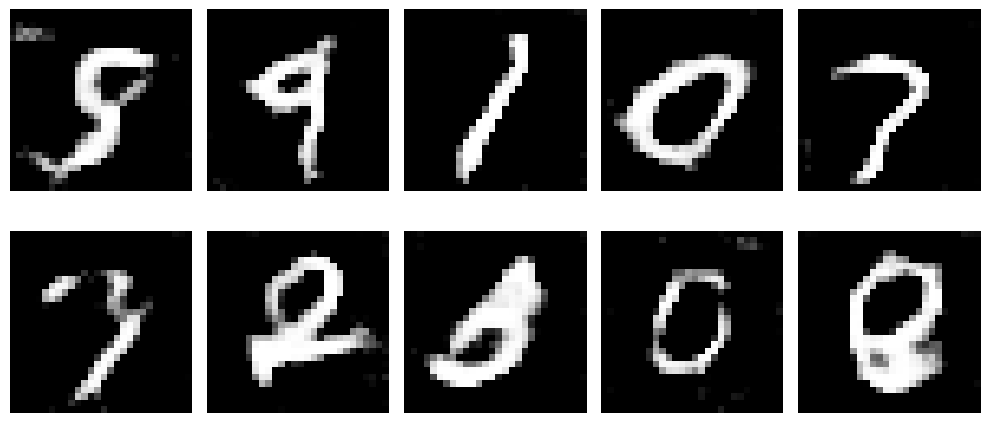

In [8]:
import torch
import matplotlib.pyplot as plt

# Generate 10 random images
with torch.no_grad():
    # Generate random noise
    noise = torch.randn(10, 100).to(device)  # 10 samples, each 100-dimensional
    generated_images = generator(noise)  # Output: [10, 784]

    # Reshape to [10, 28, 28]
    generated_images = generated_images.view(10, 28, 28)

    # Scale from [-1, 1] to [0, 1]
    generated_images = (generated_images + 1) / 2

# Convert to NumPy and plot
generated_images = generated_images.cpu().numpy()

# Display the generated images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_images[i], cmap='gray')
    ax.axis('off')  # Remove axes
plt.tight_layout()
plt.show()

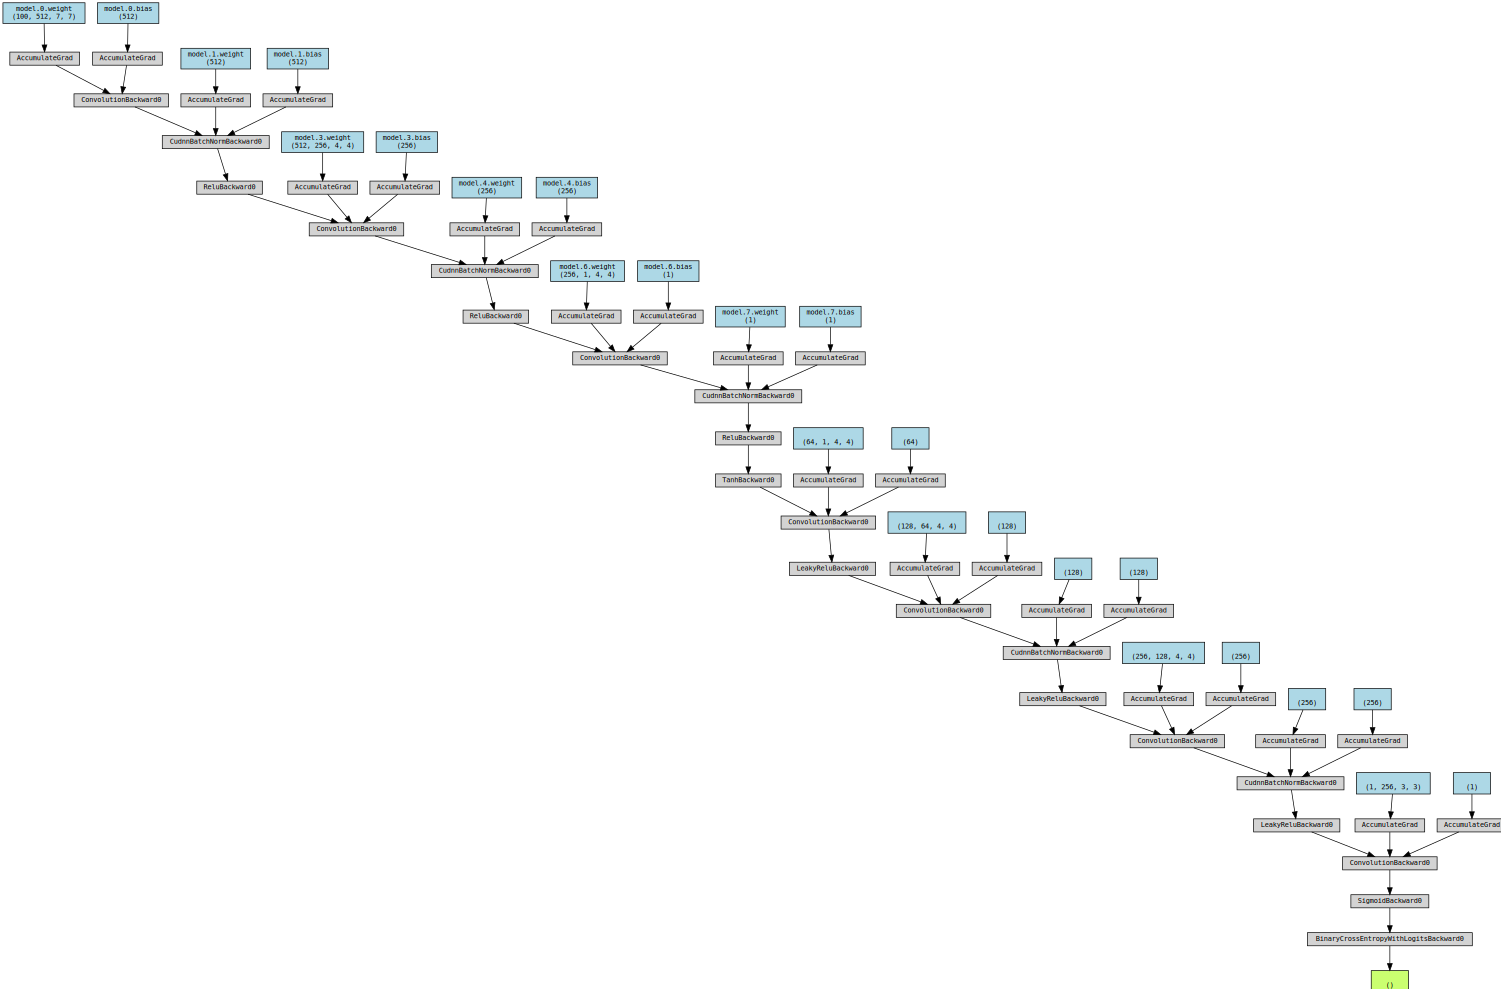

In [68]:
from torchviz import make_dot
make_dot(d_loss_fake, params=dict(generator.named_parameters()))

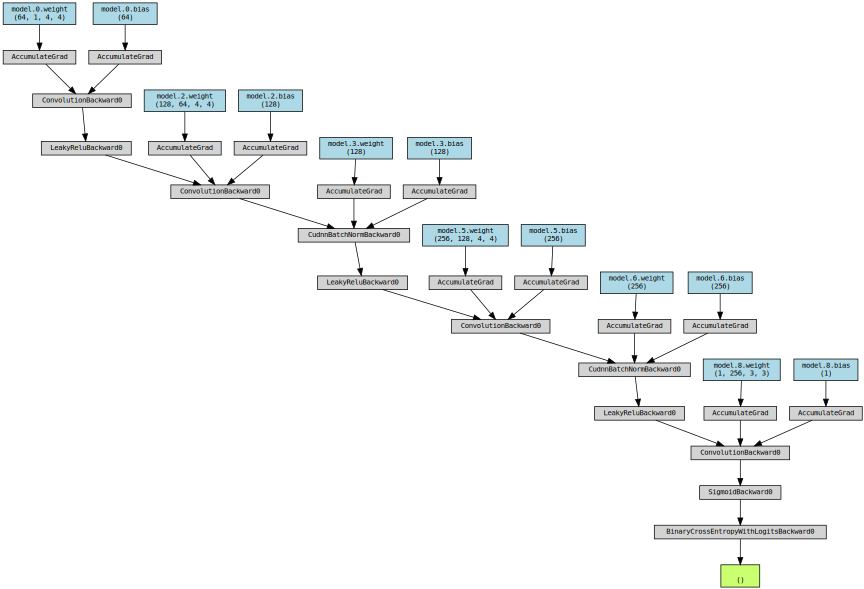

In [69]:
from torchviz import make_dot
make_dot(d_loss_real, params=dict(discriminator.named_parameters()))